# CA -Statistics for Data Analysis

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Dataset

In [2]:
d = {'Diet-Group(D)': pd.Series([4.2, 6.0, 7.1, 6.1, 4.9, 5.8, 6.7, 6.0, 7.2, 4.4, 6.0, 5.3, 7.1, 6.5, 5.6]), 'Exercise-Group(E)': pd.Series([3.7, 4.1, 5.9, 4.4, 5.0, 4.7, 5.9, 4.2, 5.5, 3.7, 4.6, 4.8, 4.4, 5.9, 4.0]) }

# Descriptive Statistics

<h3> 1. Measure of Central Tendency , variability measure </h3>

In [3]:
df = pd.DataFrame(d)
print("Mean Value",'\n', df.mean(),'\n' '\n', "Median Value:",'\n', df.median(), '\n' '\n', "Mode:", df.mode(), '\n' )


Mean Value 
 Diet-Group(D)        5.926667
Exercise-Group(E)    4.720000
dtype: float64 

 Median Value: 
 Diet-Group(D)        6.0
Exercise-Group(E)    4.6
dtype: float64 

 Mode:    Diet-Group(D)  Exercise-Group(E)
0            6.0                5.9 



<h3> Measure of Variability</h3>

In [42]:
import pandas as pd

df_numeric_diet = pd.to_numeric(df['Diet-Group(D)'], errors='coerce')
maximum_diet = df_numeric_diet.max() # finding Max Diet group
minimum_diet = df_numeric_diet.min() # finding Min Diet group

df_numeric_exer = pd.to_numeric(df['Exercise-Group(E)'], errors='coerce')
maximum_exer = df_numeric_exer.max() # finding Max Exercise group
minimum_exer = df_numeric_exer.min() # finding Min Exercise group

range_diet = maximum_diet-minimum_diet
range_exer = maximum_exer-minimum_exer

# Difference of one each other
print("\n Maximum Diet =", maximum_diet, "Minimum Diet =", minimum_die, " - Range Diet Group =", range_diet)
print("\n Maximum Exercise =", maximum_exer, "Minimum Exercise =", minimum_exer, " - Range Exercise =", range_exer)


 Maximum Diet = 7.2 Minimum Diet = 4.2  - Range Diet Group = 3.0

 Maximum Exercise = 5.9 Minimum Exercise = 3.7  - Range Exercise = 2.2


In [4]:
print("standard deviation:",'\n',df.std(numeric_only=True))

standard deviation: 
 Diet-Group(D)        0.934625
Exercise-Group(E)    0.772010
dtype: float64


In [5]:
print("Variance of groups:",'\n', np.var(df)) #printing variance of both groups

Variance of groups: 
 Diet-Group(D)        0.815289
Exercise-Group(E)    0.556267
dtype: float64


In [41]:
q1_d = np.percentile(df['Diet-Group(D)'], 25) # 25% for q1 interquartile for diet group - lower 
q3_d = np.percentile(df['Diet-Group(D)'], 75) # 75% for q3 interquartile for diet group - Higher 
iqr_diet = q3_d - q1_d #  IQR calculate

q1_e = np.percentile(df['Exercise-Group(E)'], 25) # 25% for q1 interquartile for exercise group - lower 
q3_e = np.percentile(df['Exercise-Group(E)'], 75) # 75% for q3 interquartile for exercise group - Higher 
iqr_exer =  q3_e - q1_e 

print("Interquartile Range Diet Group:", iqr_diet, "\n Interquartile Range Exer Group:", iqr_exer, )

Interquartile Range Diet Group: 1.1500000000000004 
 Interquartile Range Exer Group: 1.0999999999999996


In [ ]:
# Loking at the dataset
df.head() #first 5 rows 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, fill=True)

plt.title('PDF of Diet and Exercise Groups', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()


<h3> Probability distribution, Normal probability, Count and Unique </h3>

In [ ]:
co = df.count() #total quantities
nu = df.nunique() #quantities of unique values

print("Number of unique values:",'\n', nu, 
      '\n''\n', "Count the total:", '\n', co)

<h3> 3 - Calculate Similarity </h3>


- [x] Euclidean Distance

In [ ]:
e = np.sqrt(np.sum((df))) #Euclidean distance
print("Euclidean distance of bothe groups:", '\n' '\n', e)

- [x] Covariance

In [ ]:
c = df.cov()
print("Covariance of: \n \t" , c)  # "c" means covariance variable

# "cov_de" means covariance of cov of 'd' and 'e' diet and exercise groups
cov_de = c.loc['Diet-Group(D)', 'Exercise-Group(E)']
print('\n', "Covariance Between 'Diet Group D' and 'Exercise Group E' is: \n", cov_de)


c_array = np.cov(df)  # "c_array" means covariance variable
print('\n', '\t', "Covariance of all array:\n", c_array)

- [x] Correlation

In [ ]:
correlation = np.corrcoef(df['Diet-Group(D)'], df['Exercise-Group(E)'])
print("Correlation \n", correlation)  # Correlation  between Diet Group and Exercise

In [ ]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(df,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


<h2>Hypothesis tests</h2>

- [x] ANOVA

In [ ]:
# pip install scipy, necessery install Scipy library
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(df['Diet-Group(D)'], df['Exercise-Group(E)'])
print(f"f_statistic: {f_statistic}, p_value: {f_statistic}")

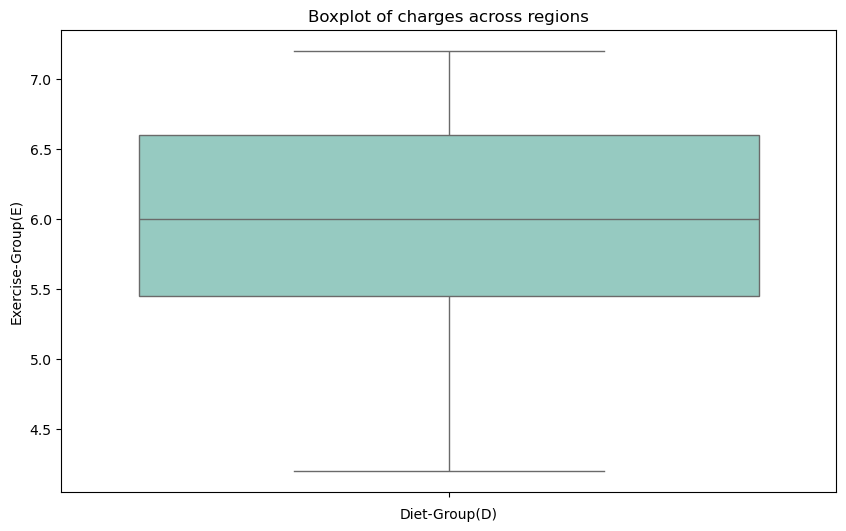

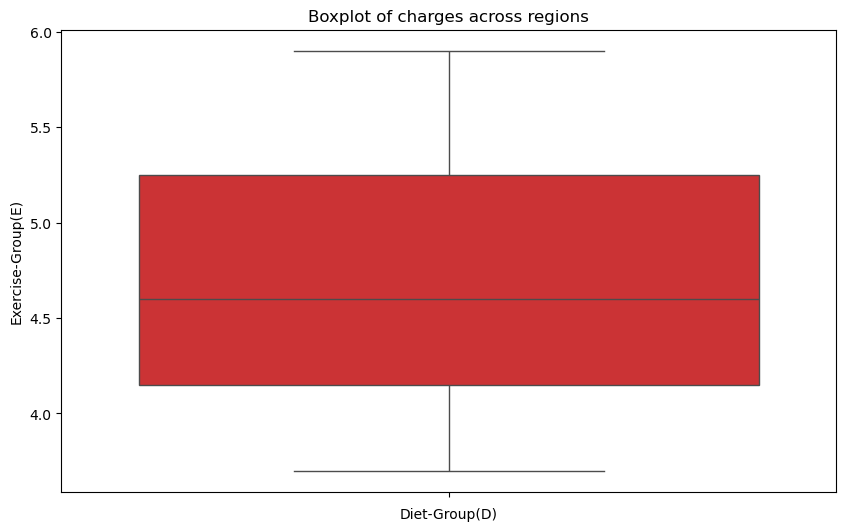

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(df['Diet-Group(D)'],palette='Set3')
plt.title('Boxplot of charges across regions')
plt.xlabel('Diet-Group(D)')
plt.ylabel('Exercise-Group(E)')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(df['Exercise-Group(E)'],palette='Set1')
plt.title('Boxplot of charges across regions')
plt.xlabel('Diet-Group(D)')
plt.ylabel('Exercise-Group(E)')
plt.show()

- [x] T Test

<h2>Measures of Frequency Distribution</h2>

In [ ]:
# Plot histogram for 'Diet-Group(D)' and 'Exercise-Group(E)'

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df["Diet-Group(D)"], bins=5, color="skyblue", edgecolor="black")
plt.title("Histogram of Diet-Group(D)")
plt.xlabel("Diet-Group(D)")
plt.ylabel("Frequency")
#plt.xlim(0, 35000)  # Set range from 0 to 35000
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["Exercise-Group(E)"], bins=5, color="skyblue", edgecolor="black")
plt.hist(df["Exercise-Group(E)"], bins=5, color="skyblue", edgecolor="black")
plt.title("Histogram of Exercise-Group(E)")
plt.xlabel("Exercise-Group(E)")
plt.ylabel("Frequency")
#plt.xlim(0, 35000)  # Set range from 0 to 35000
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()